# Test 6 solution

First, let's import a few common modules:

In [1]:
from sklearn.decomposition import PCA
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

/home/juanca/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/juanca/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Question 1

### 1.1  Getting  sea surface temperature (SST) dataset (this section was taken from Luis Vasquez exam)

In [2]:
data = xr.open_dataset('sst_xyt_dy.cdf').to_dataframe()

Splitting dataset by buoys

In [3]:
unique_buoy_info = []
unique_buoy_identifier = 1

for lat_index, lat_df in data.groupby('lat'):
    for lon_index, lon_df in lat_df.groupby('lon'):
        working_df = lon_df.reset_index()
        working_df = working_df.sort_values(by='time')
        unique_buoy_info.append({unique_buoy_identifier: (lat_index, lon_index, list(working_df['T_20']) )})
        unique_buoy_identifier += 1

sst_dataset = {}
for index, buoy in enumerate(unique_buoy_info):
    buoy_data = list(buoy.values())[0]
    
    latitude = buoy_data[0]
    longitude = buoy_data[1]
    
    if latitude < 0:
        latitude *= -1
        latitude = str(int(latitude)) + "S"        
    else:
        latitude = str(int(latitude)) + "N"
    
    if longitude > 180:
        longitude = 360 - longitude
        longitude = str(int(longitude)).zfill(3) + "W"
    else:
        longitude = str(int(longitude)).zfill(3) + "E"

    buoy = '{}{}'.format(latitude, longitude)
    sst_dataset[buoy] = buoy_data[2]

Creating the DataFrame

In [4]:
df0 = pd.DataFrame(sst_dataset)
df0.index = data.index.get_level_values('time').unique()
nan = df0.loc['1980-03-07']['8S137E'].ravel()[0]
df0[df0 == nan] = df0[df0 == nan].replace({nan : np.nan}) # replacing nan value by np.nan
df0

,8S137E,8S147E,8S156E,8S165E,8S180E,8S170W,8S155W,8S140W,8S125W,8S110W,...,9N147E,9N156E,9N165E,9N180E,9N170W,9N155W,9N140W,9N125W,9N110W,9N095W
time,,,,,,,,,,,,,,,,,,,,,
1980-03-07 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-08 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-09 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-10 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-11 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-12 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-13 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-14 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-15 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2  Data cleaning and preprocessing

Data preprocessing is the first (and arguably most important) step toward building a working machine learning model. It’s critical! First of all, let us examine how many missing values there are by each buoy per year.

In [5]:
years = df0.index.year.unique()
x = pd.DataFrame(index=years,columns=df0.columns)

for year in  years:
    w = -df0[df0.index.year==year].isna()
    x.loc[year] = w.sum()
x.T.loc[:,'1989':]

time,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
8S137E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8S147E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8S156E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8S165E,0,0,140,209,364,363,290,366,364,341,177,159,363,364,362,289,365,365,365,366
8S180E,0,0,0,0,40,316,29,363,363,362,364,364,363,365,365,366,364,365,365,366
8S170W,0,0,0,133,364,346,10,364,364,363,363,364,364,365,365,366,365,365,365,366
8S155W,0,0,0,292,363,363,363,364,362,363,363,364,364,365,365,366,365,365,365,366
8S140W,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8S125W,0,0,0,101,364,361,362,356,363,235,363,364,357,263,365,366,365,254,224,364
8S110W,0,0,0,294,363,363,363,365,363,363,363,365,365,363,365,239,364,293,180,360


By virtue of the table above we will restric our study to the 1991-2008 period and we will consider only the buoys that have more than 2640 non-missing values in that period of time:

In [6]:
selected_buoys = np.sum(x.T.loc[:,'1991':], axis=1) > 2640
df = df0.loc[df0.index.year>=1991, selected_buoys]
df.shape

(6575, 68)

In this way, we got the same buoys worked in the paper. Now, let us show some statistics:

In [7]:
statistics = []
for buoy in df.columns:
    statistics.append([buoy,
          len(df[buoy].dropna()),
          np.round(df[buoy].dropna().mean(), 2),
          np.round(df[buoy].dropna().std(), 2),
          np.round(df[buoy].dropna().min(), 2),
          np.round(df[buoy].dropna().max(), 2)])
    
table_1 = pd.DataFrame(statistics, columns=['Site', 'Freq', 'Mean', 'St.Dev.', 'MIN', 'MAX'])
display(HTML('<h3>Table 1:</h3>'))
table_1.style.hide_index()

Site,Freq,Mean,St.Dev.,MIN,MAX
8S165E,5612,29.47,0.61,27.4,31.19
8S180E,5120,29.58,0.47,28.13,30.99
8S170W,5592,29.38,0.49,27.86,31
8S155W,6118,28.83,0.61,27.04,30.96
8S125W,5427,26.74,0.89,24.12,29.88
8S110W,5731,25.7,1.24,22.44,29.22
8S095W,4940,24.62,1.99,20.35,28.99
5S156E,5856,29.66,0.57,27.06,31.28
5S165E,6284,29.73,0.44,27.84,31.21
5S180E,5436,29.52,0.6,26.84,31.01


Finally, let us fill the missing values as we did in the **test 1** exam and standardize the columns so that each column's mean and variance become 0 and 1 respectively.

In [8]:
def get_data_by_date(dataframe, month, day):
    same_date_data = dataframe[(dataframe.index.month == month) & (dataframe.index.day == day)]
    return same_date_data
X = pd.DataFrame.copy(df)
for buoy in df.columns: # For each temperature column
    nan_indices = df[buoy].isna()
    for index in df[nan_indices].index:
        X.loc[index,buoy] = get_data_by_date(df[buoy], index.month, index.day).mean()
Y = X - X.mean()
sigma = np.sqrt(Y.apply(lambda x: x*x).sum())
Z = Y/sigma

Now we are ready to apply our Principal Component Analysis (**PCA**) procedure.

### 1.3 Exploratory data analysis with PCA

In [9]:
pca = PCA(n_components = 10)
SCALE_FACTOR = 79.2452 
pca.fit(SCALE_FACTOR*Z)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The, let us gather eigenvalues and percentage of variance explained by each of the first ten components:

In [10]:
val = pca.explained_variance_
per = pca.explained_variance_ratio_*100 

In [11]:
statistics = []
j = 0
cum = 0
for j in range(10):
    cum = cum + per[j]
    statistics.append([j+1,
          np.round(val[j],4),
          np.round(per[j],2),
          np.round(cum,2)])
table_2 = pd.DataFrame(statistics, columns=['N', 'Eigenvalue', 'Percentage', 'Cumulate'])
display(HTML('<h3>Table 2:</h3>'))
table_2.style.hide_index()

N,Eigenvalue,Percentage,Cumulate
1,21.4221,32.98,32.98
2,16.0102,24.65,57.63
3,5.8634,9.03,66.65
4,4.1412,6.38,73.03
5,1.7071,2.63,75.66
6,1.3996,2.15,77.81
7,1.0933,1.68,79.49
8,0.8285,1.28,80.77
9,0.7242,1.11,81.88
10,0.6744,1.04,82.92


Setting our plane axes as the first two principal components and making their respective labels:

In [12]:
first_two = pca.components_[0:2].T
axis1 = 'Axis 1 - ' + str(np.round(per[0],2)) + '%'
axis2 = 'Axis 2 - ' + str(np.round(per[1],2)) + '%'

Then let us plot the buoys on the plane spanned by the first two principal components, i.e., the **principal plane**.

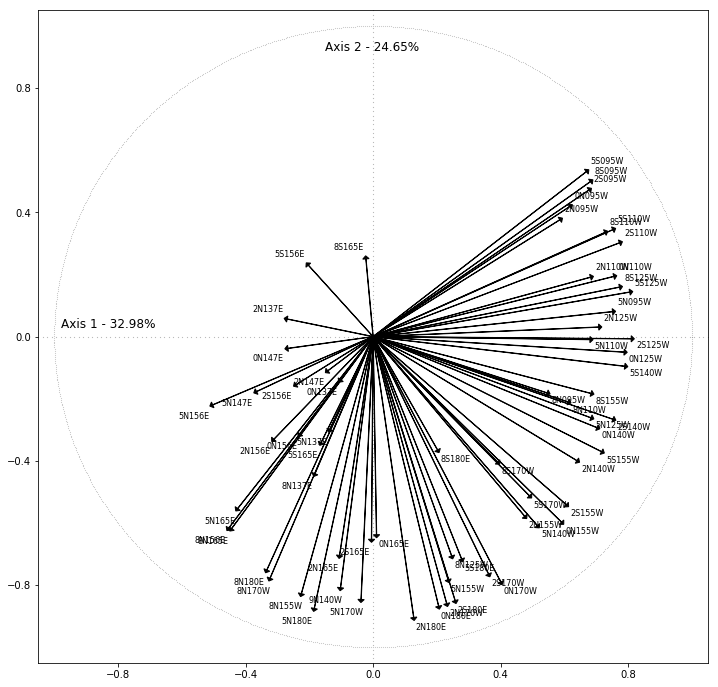

In [13]:
normals = first_two*4.2 #scaling the first two principal components in order to get the desired graphic
fig = plt.figure(figsize=(12,12))
j = 0
for buoy in X.columns:
    x = normals[j,0]
    y = normals[j,1]
    j += 1
    plt.arrow(0, 0, x, y, head_width=0.02, length_includes_head=True, head_length=0.01, fc='k', ec='k')
    # setting the text position according to the quadrant
    if x < 0:
        x_text = x-.1
        if y < 0:
            y_text = y-.04
        else:
            y_text = y+.02
    else:
        x_text = x+.005
        if y < 0:
            y_text = y-.03
        else:
            y_text = y+.02
    plt.text(x_text, y_text, buoy, fontsize=8)    
theta = np.linspace(0, 2*np.pi, 1000)
x1 = np.cos(theta)
x2 = np.sin(theta)
plt.scatter(x1, x2, color='k', s=0.005)
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.xticks(np.arange(-.8, .9, .4))
plt.yticks(np.arange(-.8, .9, .4))
xx = np.linspace(-1.05, 1.05, 150)
yy = np.zeros(150)
plt.scatter(xx, yy, color='k', s=0.01)
plt.text(-.98, .03, axis1, fontsize=12)
plt.scatter(yy, xx, color='k', s=0.01)
plt.text(-.15, .92, axis2, fontsize=12)
display(HTML('<h3>Figure 2:</h3>'))
plt.show()

Now, let us project our cloud of points from $\mathcal{R}^{68}$ to the principal plane:

In [14]:
projected_cloud = Y.to_numpy().dot(first_two)
projected_cloud.shape

(6575, 2)

Finally, let us plot this projected cloud on that plane:

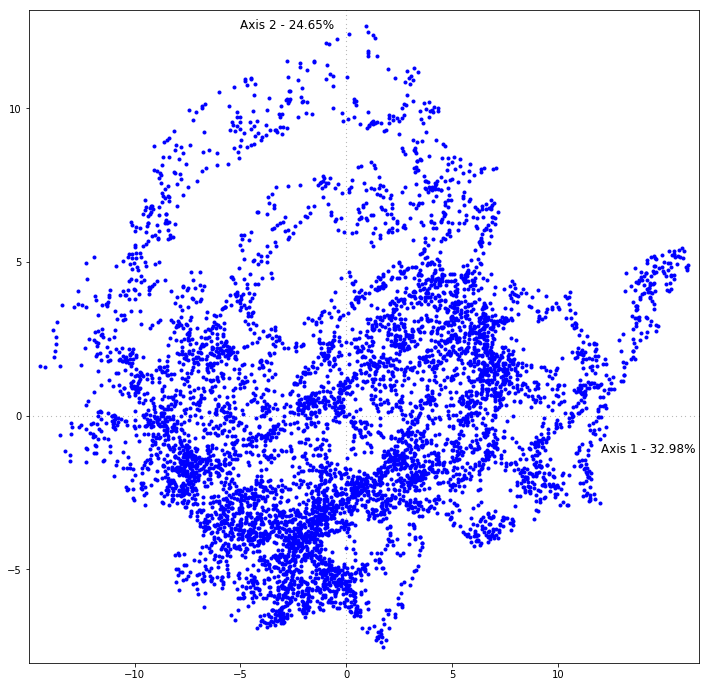

In [15]:
fig = plt.figure(figsize=(12,12))
x_min = projected_cloud[:,0].min()-.5
x_max = projected_cloud[:,0].max()+.5
y_min = projected_cloud[:,1].min()-.5
y_max = projected_cloud[:,1].max()+.5
plt.axis([x_min, x_max, y_min, y_max])
plt.xticks(np.arange(-10, 11, 5))
plt.yticks(np.arange(-5, 11, 5))
xx = np.linspace(x_min, x_max, 150)
yy = np.zeros(150)
plt.scatter(xx, yy, color='k', s=0.01)
plt.text(x_max-4.6, -1.2, axis1, fontsize=12)
xx = np.linspace(y_min, y_max, 150)
plt.scatter(yy, xx, color='k', s=0.01)
plt.text(-5, y_max-.6, axis2, fontsize=12)
plt.scatter(projected_cloud[:,0], projected_cloud[:,1], c='blue', marker='.')
display(HTML('<h3>Figure 3:</h3>'))
plt.show()

## Question 2 (most of the code bellow was taken from Luis Vasquez exam)

First, let's import a few common modules; for the implementation of the Gap Statistic see: https://github.com/milesgranger/gap_statistic

In [16]:
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from gap_statistic import OptimalK 

### 2.1 An Elbow Method Algorithm

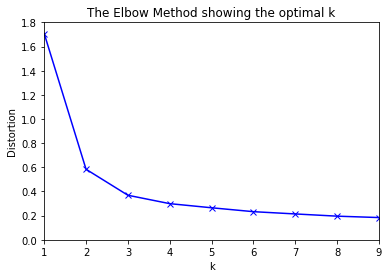

In [17]:
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
data = x[['petal length (cm)', 'petal width (cm)']]

distortions = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distortions[k] = sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]

display(HTML('<h3>Figure 1:</h3>'))
plt.plot(list(distortions.keys()), list(distortions.values()), marker='x', c='b')
plt.xticks(np.arange(1, 10, 1))
plt.yticks(np.arange(0, 1.9, 0.2))
plt.axis([1, 9, 0, 1.8])
plt.title("The Elbow Method showing the optimal k")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.show()

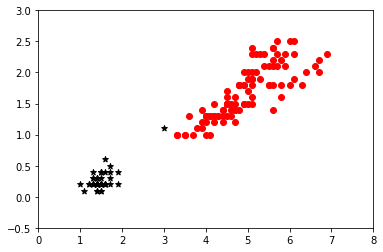

In [18]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
data['cluster'] = kmeans.labels_
color = {0: 'r', 1:'#000000'}

display(HTML('<h3>Figure 2:</h3>'))
plt.scatter(data.loc[data['cluster'] == 1]['petal length (cm)'], data.loc[data['cluster'] == 1]['petal width (cm)'], c='#000000', marker='*')
plt.scatter(data.loc[data['cluster'] == 0]['petal length (cm)'], data.loc[data['cluster'] == 0]['petal width (cm)'], c='r')
plt.xticks(np.arange(0, 9, 1))
plt.yticks(np.arange(-0.5, 3.5, 0.5))
plt.show()

### 2.2 The gap statistic algorithm

In [19]:
optimalK = OptimalK(parallel_backend='rust')
optimalK

OptimalK(n_jobs=2, parallel_backend="rust")

In [20]:
X = iris.data[:,2:]
n_clusters = optimalK(X, cluster_array=np.arange(1, 9))
print('Optimal clusters: ', n_clusters)

Optimal clusters:  6


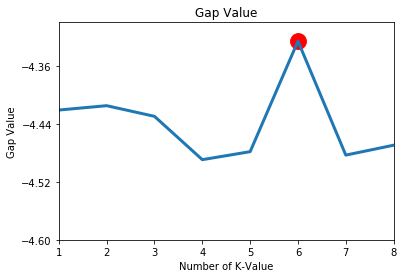

In [21]:
display(HTML('<h3>Figure 3:</h3>'))

plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.xticks(np.arange(1, 9, 1))
plt.yticks(np.arange(-4.6, -4.3, 0.08))
plt.axis([1, 8, -4.6, -4.3])
plt.xlabel('Number of K-Value')
plt.ylabel('Gap Value')
plt.title('Gap Value')
plt.show()

### 2.3 The silhouette coefficient algorith

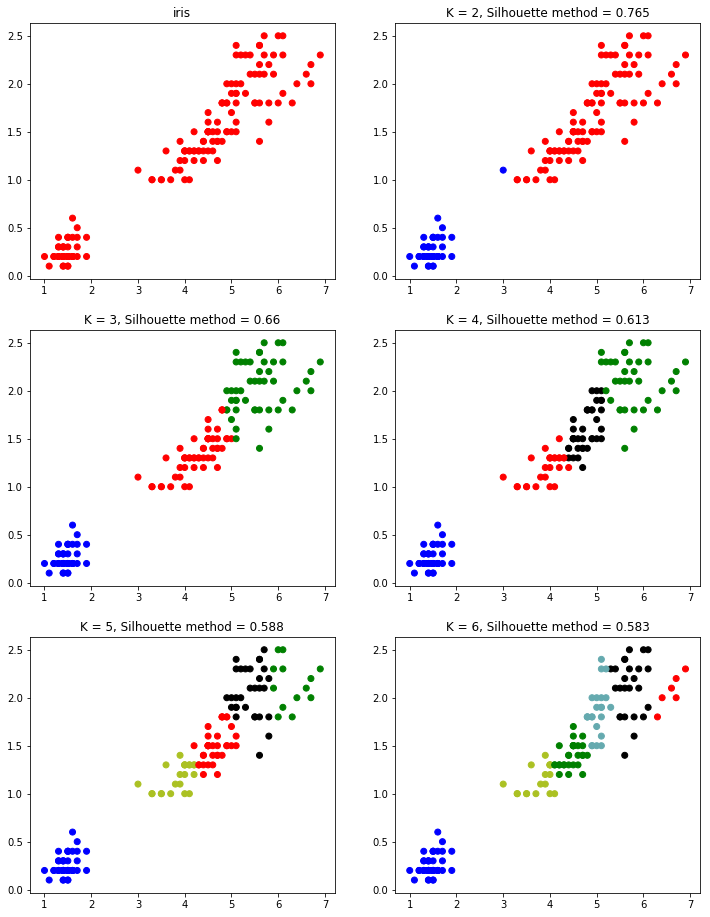

In [22]:
original_data = data.iloc[:,[0,1]]
fig, axs = plt.subplots(3, 2, figsize=(12,16))
colors = {0:'r', 1:'b', 2:'g', 3:'#000000', 4:'#abc123', 5:'#65aaaf', 6:'#ab3434'}
display(HTML('<h3>Figure 4:</h3>'))

for k, ax in zip(range(1, 7), axs.flatten()):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(original_data)
    labels = kmeans.labels_
    
    if k != 1:
        silhouette_val = silhouette_score(original_data, labels)
        ax.title.set_text('K = {}, Silhouette method = {}'.format(k, round(silhouette_val, 3)))
    else:
        ax.title.set_text('iris')
    ax.scatter(original_data['petal length (cm)'], original_data['petal width (cm)'], c=[colors[label] for label in labels])
    
plt.show()